In [1]:
import spyx
import spyx.nn as snn

import jax
import jax.numpy as jnp
import numpy as np

import nir
# for loading dataset
import torch

import matplotlib.pyplot as plt

In [2]:
ng = nir.read("braille_subtract.nir")

In [3]:
data = torch.load("ds_test.pt")

In [4]:
x, y = data.tensors

In [5]:
x = jnp.array(x)

In [6]:
y = jnp.array(y)

In [7]:
x.shape # --> 256 time

(140, 256, 12)

In [25]:
n_list = ["input", "fc1", "lif1.lif", "lif1.w_rec", "output"]
subgraph_nodes = {k : ng.nodes[k] for k in n_list}
subgraph_edges = [
    ('input', 'fc1'),
    ('fc1', 'lif1.lif'),
    ('lif1.lif', 'lif1.w_rec'),
    ('lif1.w_rec', 'lif1.lif'),
    ('lif1.lif', 'output')
]
subgraph = nir.NIRGraph(subgraph_nodes, subgraph_edges)
subgraph.nodes["output"].output_type['output'] = np.array([55])

In [26]:
SNN, params = spyx.nir.from_nir(subgraph, x, dt=1e-4, return_all_states=True)

[INFO] found RNN subgraph, replacing with NIRGraph node
[INFO] subgraph edges: ('lif1.lif', 'lif1.w_rec'), ('lif1.w_rec', 'lif1.lif')
found subgraph, trying to parse as RNN
found subgraph, trying to parse as RNN


In [27]:
params.keys()

dict_keys(['linear', 'RCuBaLIF'])

In [28]:
a, b = SNN.apply(params, x)

found subgraph, trying to parse as RNN


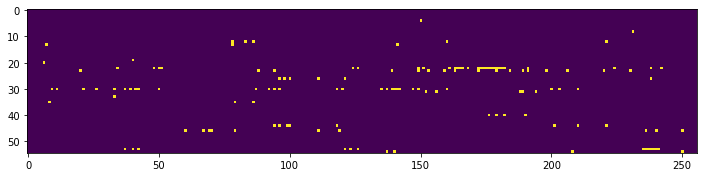

In [30]:
plt.figure(figsize=(12,4))
plt.imshow(a[0].T, interpolation="none")

In [68]:
ng = nir.read("braille_subtract.nir")

In [8]:
SNN, params = spyx.nir.from_nir(ng, x, dt=1e-4, return_all_states=True)

[INFO] found RNN subgraph, replacing with NIRGraph node
[INFO] subgraph edges: ('lif1.lif', 'lif1.w_rec'), ('lif1.w_rec', 'lif1.lif')
found subgraph, trying to parse as RNN
found subgraph, trying to parse as RNN


In [9]:
a, b = SNN.apply(params, x)

found subgraph, trying to parse as RNN


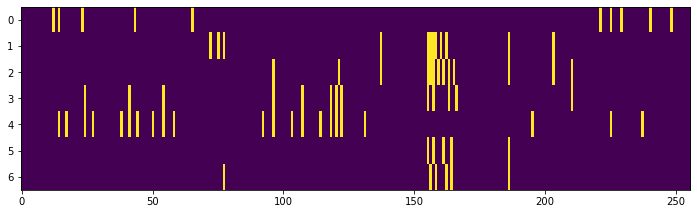

In [13]:
plt.figure(figsize=(12,4))
plt.imshow(a[1].T, aspect=10, interpolation="none")

In [11]:
y

Array([1, 3, 2, 2, 6, 1, 1, 3, 4, 5, 4, 0, 5, 5, 0, 2, 4, 3, 1, 2, 5, 2,
       4, 6, 2, 2, 4, 1, 4, 4, 1, 3, 2, 0, 4, 5, 1, 0, 3, 5, 1, 2, 0, 4,
       5, 4, 5, 6, 6, 1, 4, 5, 0, 2, 3, 4, 5, 0, 2, 5, 5, 5, 6, 5, 6, 4,
       1, 2, 6, 1, 0, 0, 6, 4, 0, 3, 3, 0, 1, 6, 2, 0, 3, 1, 0, 1, 2, 0,
       3, 0, 0, 0, 4, 6, 1, 3, 2, 5, 2, 6, 0, 5, 5, 0, 3, 1, 6, 6, 3, 2,
       4, 4, 6, 3, 6, 2, 2, 5, 3, 6, 2, 1, 3, 6, 5, 4, 5, 4, 1, 6, 3, 0,
       3, 6, 3, 1, 6, 4, 3, 1], dtype=int32)

In [12]:
spyx.fn.integral_accuracy(a, y)

(Array(0.49285716, dtype=float32),
 Array([1, 4, 1, 1, 0, 1, 1, 4, 4, 0, 4, 0, 0, 0, 0, 1, 4, 4, 1, 1, 0, 4,
        4, 0, 4, 2, 4, 1, 4, 4, 1, 4, 1, 0, 4, 0, 1, 0, 4, 0, 1, 2, 0, 4,
        0, 4, 0, 0, 0, 1, 4, 0, 0, 1, 3, 4, 0, 0, 1, 0, 0, 0, 0, 0, 0, 4,
        1, 4, 6, 1, 0, 0, 0, 4, 0, 4, 4, 0, 1, 0, 4, 0, 4, 1, 0, 1, 1, 0,
        4, 0, 0, 0, 4, 0, 1, 1, 1, 0, 2, 0, 0, 0, 0, 0, 4, 1, 6, 6, 4, 2,
        4, 4, 0, 2, 0, 1, 4, 0, 4, 0, 4, 1, 4, 0, 0, 4, 0, 4, 1, 0, 4, 0,
        4, 6, 4, 1, 1, 4, 2, 1], dtype=int32))

In [28]:
b[0].shape

(280, 256, 55)